# Intro to Machine Learning Workshop: Act 1

This notebook is part of an Intro to Machine Learning workshop. It was used to generate the diagrams for the slides used in the presentation at the start of the workshop.

---

## Classification

An example of a simple linear classifier, applied to random data.

We'll use `numpy` to generate random numbers for the examples, `sklearn` to build the classifier, and `matplotlib` to visualise the results.

In [89]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from sklearn.linear_model import LogisticRegression

Since we're doing this in a Jupyter Notebook, we need to configure the notebook to render `matplotlib`'s output inline.

In [90]:
%matplotlib inline

Next, we'll change some `matplotlib` settings to make the images look better on slides with a black background by drawing the axes, ticks, and labels in white. This is purely an aesthetic choice for the presentation, but it serves as a nice example of `matplotlib` configuration.

In [91]:
matplotlib.rc('axes', edgecolor='w')
matplotlib.rc('xtick', color='w')
matplotlib.rc('ytick', color='w')

We want the results to be exactly repeatable, so we'll fix `numpy`'s random number generation seed to make sure we get the same random numbers each time we run this notebook. I picked 42 (because I'm a hoopy frood who really knows where his towel is) but any number would have been fine.

In [92]:
np.random.seed(42)

Now we can generate the random data we'll use in our classification example. We want the data to overlap and intermingle a little, but not too much. To get that effect, we'll use the same range for the two group's y co-ordinates, and different but overlapping ranges for their x co-ordinates.

In [93]:
group_a = np.column_stack((
    np.random.randint(0, 155, size=100),
    np.random.randint(0, 255, size=100),
))
group_b = np.column_stack((
    np.random.randint(100, 255, size=100),
    np.random.randint(0, 255, size=100),
))

Now we're ready to generate our first diagram: the raw, random data sets.

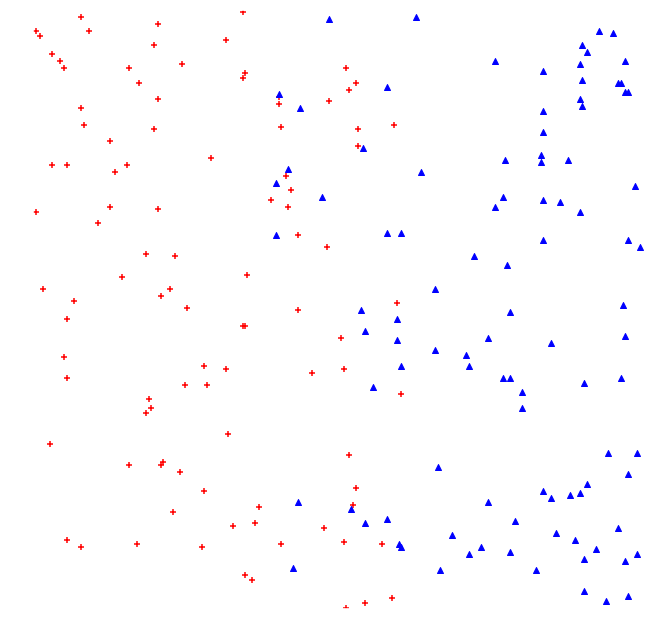

In [94]:
plt.figure(figsize=(11, 11))
plt.scatter(group_a[:, 0], group_a[:, 1], c='r', marker='+')
plt.scatter(group_b[:, 0], group_b[:, 1], c='b', marker='^')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()

Next, we'll start working on our classifier. The first step is to combine our datasets into a single input matrix, with a vector with the expected group assignments (we'll call the groups `0` and `1`).

In [95]:
inputs = np.concatenate((group_a, group_b))
classes = np.array([0] * len(group_a) + [1] * len(group_b))

We can now create a classifier, and train (or fit) it to our data.

In [96]:
classifier = LogisticRegression(verbose=True)
classifier.fit(X, y)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=True, warm_start=False)

When we render the classification areas, we'll want them to be rendered in semi-transparent red and blue to match the colours of the groups in the previous visualisaiton. To achieve this, we need to create a custom colormap for `matplotlib` to use.

In [97]:
red_blue_cmap = LinearSegmentedColormap.from_list(
    'RedBlue',
    [(1, 0, 0, 0.5), (0, 0, 1, 0.5)],
)
plt.register_cmap(cmap=red_blue_cmap)

To render the regions that the classifier will assign to our red and blue groups, we'll ask it to classify a dense grid of points across the whole of our co-ordinate space. First, let's generate the points in the grid.

In [98]:
step_size = 0.1
grid_x, grid_y = np.meshgrid(
    np.arange(0, 255, step_size),
    np.arange(0, 255, step_size),
)

Now we can get our classifier's predictions for the grid.

In [99]:
grid_coords = np.c_[grid_x.ravel(), grid_y.ravel()]
grid_classes = classifier.predict(grid_coords).reshape(grid_x.shape)

Finally, we're ready to render our partitioned feature space, with the regions the classifier will predict belong to the red and blue classes.

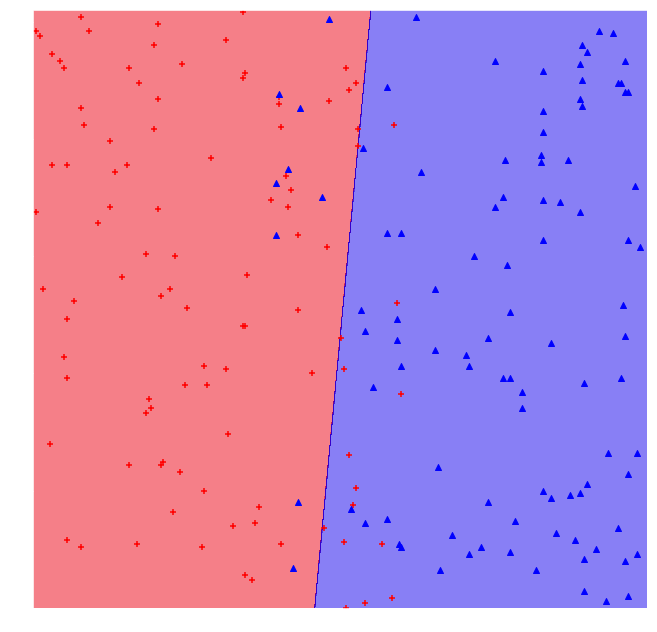

In [100]:
plt.figure(figsize=(11, 11))
plt.contourf(grid_x, grid_y, grid_classes, cmap='RedBlue')
plt.scatter(group_a[:, 0], group_a[:, 1], c='r', marker='+')
plt.scatter(group_b[:, 0], group_b[:, 1], c='b', marker='^')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()